In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import community.community_louvain as community_louvain
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# !pip install community
# !pip install networkx
# !pip install python-louvain

In [2]:
data = pd.read_csv("./Data/student_all.csv")

In [3]:
data.rename(columns={"sex":"gender"}, inplace=True)

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data['alc'] = data['Dalc'] + data['Walc']

In [6]:
indexes = [i for i in range(data.shape[0])]
indexes = pd.DataFrame({"Names":indexes})
indexes
data = pd.concat([data, indexes], axis=1)

In [7]:
data["guardian"][data["guardian"] == "father"] = "parent"
data["guardian"][data["guardian"] == "mother"] = "parent"

C:\Users\Marin\AppData\Local\Temp/ipykernel_3248/3828257580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "father"] = "parent"
C:\Users\Marin\AppData\Local\Temp/ipykernel_3248/3828257580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "mother"] = "parent"


In [8]:
data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1

C:\Users\Marin\AppData\Local\Temp/ipykernel_3248/2866260647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1


In [9]:
data["guardian"].unique()

array(['parent', 'other'], dtype=object)

In [10]:
data.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,course,alc,Names
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,1,5,6,6,mat,2,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,1,5,5,6,mat,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,1,7,8,10,mat,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,1,15,14,15,mat,2,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,1,6,10,10,mat,3,4
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,1,15,15,15,mat,3,5
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,mat,2,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,1,6,5,6,mat,2,7
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,1,0,16,18,19,mat,2,8
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,14,15,15,mat,2,9


In [11]:
data.tail(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,course,alc,Names
1036,MS,F,18,R,GT3,T,2,2,at_home,other,...,1,3,4,0,14,17,15,por,4,1036
1037,MS,F,17,U,GT3,T,4,3,teacher,other,...,1,1,1,0,6,9,11,por,2,1037
1038,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,2,2,5,1,7,9,10,por,4,1038
1039,MS,F,19,R,GT3,T,2,3,services,other,...,1,2,5,1,10,11,10,por,3,1039
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,1,1,15,15,16,por,2,1040
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,5,1,11,12,9,por,2,1041
1042,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,1,10,10,10,por,7,1042
1043,MS,M,18,R,LE3,T,3,2,services,other,...,3,4,5,1,10,11,11,por,7,1043
1044,UN,M,23,U,GT3,T,4,4,other,other,...,2,4,4,1,12,15,13,mat,6,1044
1045,UN,F,22,U,LE3,T,3,3,teacher,teacher,...,2,3,3,15,13,16,14,mat,5,1045


In [12]:
data.shape

(1046, 36)

In [13]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course', 'alc',
       'Names'],
      dtype='object')

In [14]:
# To install a package in a Jupyter Notebook
# !pip install *package name*

In [15]:
data_vec = data.to_numpy()

In [16]:
data_vec.shape

(1046, 36)

In [17]:
data_vec

array([['GP', 'F', 18, ..., 'mat', 2, 0],
       ['GP', 'F', 17, ..., 'mat', 2, 1],
       ['GP', 'F', 15, ..., 'mat', 5, 2],
       ...,
       ['MS', 'M', 18, ..., 'por', 7, 1043],
       ['UN', 'M', 23, ..., 'mat', 6, 1044],
       ['UN', 'F', 22, ..., 'mat', 5, 1045]], dtype=object)

In [18]:
data_vec[1, :]

array(['GP', 'F', 17, 'U', 'GT3', 'T', 1, 1, 'at_home', 'other', 'course',
       'parent', 1, 2, 0, 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 5, 3, 3, 1, 1, 3, 1, 5, 5, 6, 'mat', 2, 1], dtype=object)

In [19]:
data_vec[1, 1] == data_vec[1, 1]

True

In [20]:
data_vec.shape

(1046, 36)

In [21]:
G = nx.Graph()

In [22]:
# TODO: Define a threshold
# lim -> 0 similare
# lim -> infinite different
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        for col in range(data_vec.shape[1]):
            list_difference.append(data_vec[vec - 1, col-1] != data_vec[vecs, col-1])
            diff_score = sum(list_difference)
            list_of_scores.append(diff_score)
        if diff_score < 9:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass

In [24]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 39350520
Mean: 9.9017
Median: 9.0
Max: 34
Min: 0


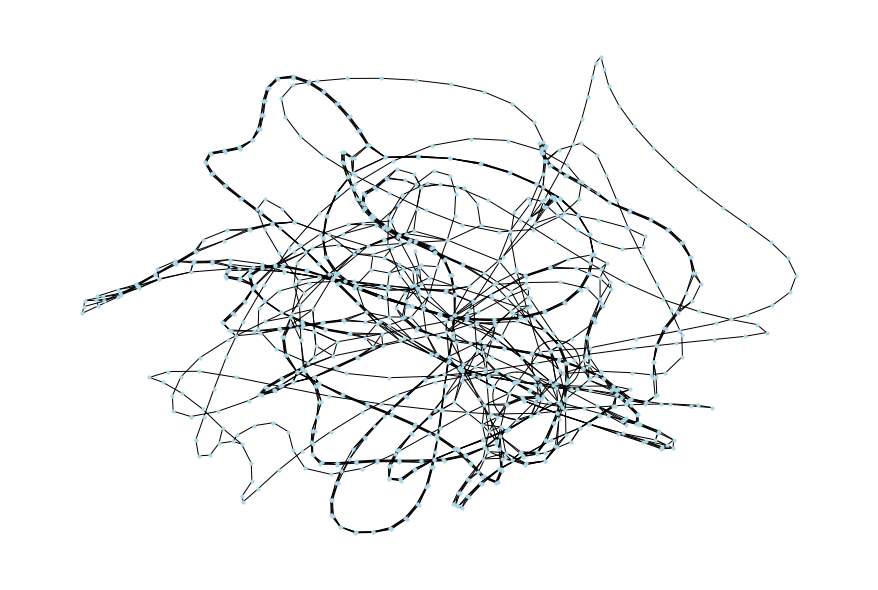

In [23]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'black'
}

nx.draw(G, **graph_options)
plt.show()

In [24]:
weighting = {'school': 1,
             'gender':1.5,
             'age':0.5,
             'address':1,
             'famsize':0.5,
             'Pstatus':1.5,
             'Medu':1,
             'Fedu':1,
             'Mjob':1.5,
             'Fjob':1.5,
             'reason':0.5,
             'guardian':1,
             'traveltime':0.5,
             'studytime':1,
             'failures':1,
             'schoolsup':1,
             'famsup':1,
             'paid':0.5,
             'activities':1,
             'nursery':0.5,
             'higher':0.5,
             'internet':1.5,
             'romantic':1,
             'famrel':1.5,
             'freetime':0.5,
             'goout':1,
             'Dalc':1.5,
             'Walc':1.5,
             'health':1,
             'absences':1,
             'G1':0.5,
             'G2':0.5,
             'G3':0.5,
             'course':0.5,
             'alc':1.5,
             'Names':0
            }


In [25]:
columns_name = list(data.columns)
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        score = 0
        for col in range(data_vec.shape[1]):
            if data_vec[vec - 1, col-1] != data_vec[vecs, col-1]:
                score += weighting[columns_name[col]]
                list_of_scores.append(score)
        
        if score < 10.5:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass
    

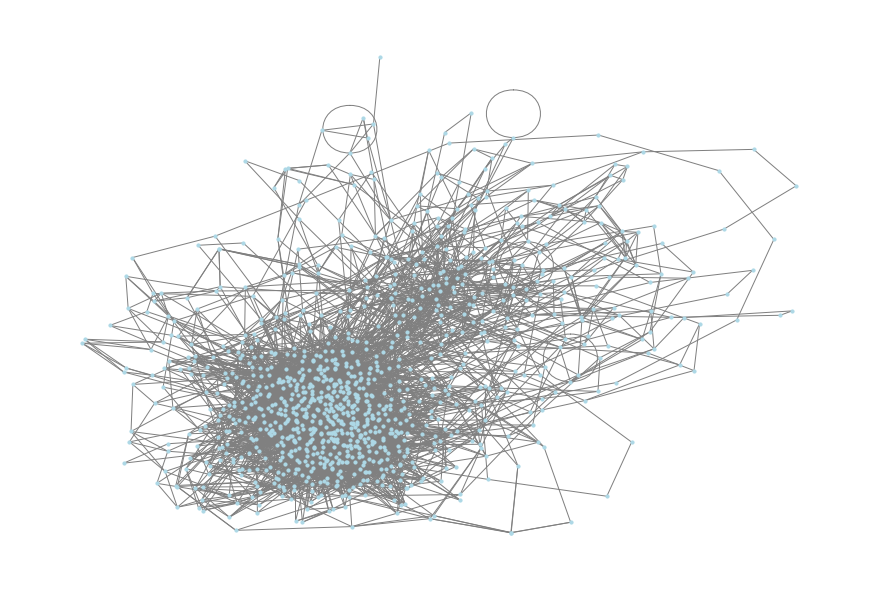

In [32]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'grey'
}

nx.draw(G, **graph_options, label=True)
plt.show()

In [29]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 22184068
Mean: 10.7434
Median: 10.5
Max: 32.5
Min: 1.0


In [33]:
partition = community_louvain.best_partition(G)
len(partition)

1046

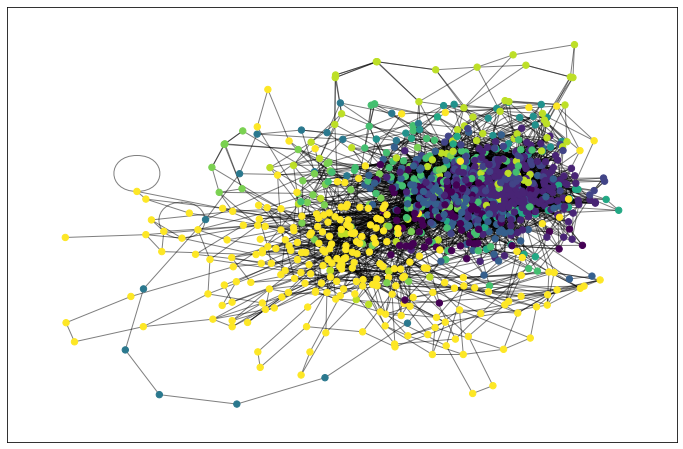

In [34]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [35]:
set(partition.values())
# Donc il y a 10 communautés ?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [36]:
partition_sort = collections.OrderedDict(sorted(partition.items()))
partition_sort

OrderedDict([(0, 1),
             (1, 0),
             (2, 0),
             (3, 2),
             (4, 2),
             (5, 1),
             (6, 3),
             (7, 3),
             (8, 1),
             (9, 1),
             (10, 1),
             (11, 1),
             (12, 1),
             (13, 1),
             (14, 1),
             (15, 1),
             (16, 1),
             (17, 1),
             (18, 1),
             (19, 1),
             (20, 1),
             (21, 1),
             (22, 1),
             (23, 1),
             (24, 1),
             (25, 1),
             (26, 3),
             (27, 3),
             (28, 1),
             (29, 1),
             (30, 1),
             (31, 1),
             (32, 1),
             (33, 1),
             (34, 9),
             (35, 9),
             (36, 1),
             (37, 1),
             (38, 1),
             (39, 1),
             (40, 0),
             (41, 0),
             (42, 1),
             (43, 1),
             (44, 5),
             (45, 5)

In [37]:
partition_sorted = dict(sorted(partition.items()))
partition_sorted

{0: 1,
 1: 0,
 2: 0,
 3: 2,
 4: 2,
 5: 1,
 6: 3,
 7: 3,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 3,
 27: 3,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 9,
 35: 9,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 0,
 41: 0,
 42: 1,
 43: 1,
 44: 5,
 45: 5,
 46: 5,
 47: 1,
 48: 1,
 49: 1,
 50: 6,
 51: 6,
 52: 6,
 53: 6,
 54: 6,
 55: 6,
 56: 1,
 57: 1,
 58: 1,
 59: 6,
 60: 6,
 61: 6,
 62: 6,
 63: 6,
 64: 6,
 65: 6,
 66: 6,
 67: 1,
 68: 1,
 69: 1,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 1,
 75: 1,
 76: 1,
 77: 2,
 78: 2,
 79: 0,
 80: 0,
 81: 3,
 82: 3,
 83: 3,
 84: 3,
 85: 3,
 86: 3,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 8,
 118: 8,
 119: 0,
 120: 0,
 121: 3,
 122: 3,
 12

In [38]:
partition_sorted = pd.DataFrame.from_dict(partition_sorted, orient="index")

In [39]:
partition_sorted

,0
0,1
1,0
2,0
3,2
4,2
...,...
1041,10
1042,10
1043,10
1044,10


In [40]:
data = pd.concat([data, partition_sorted], axis=1)

In [41]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,0
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6,mat,2,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15,mat,2,3,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10,mat,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9,por,2,1041,10
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10,por,7,1042,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,1,10,11,11,por,7,1043,10
1044,UN,M,23,U,GT3,T,4,4,other,other,...,4,4,1,12,15,13,mat,6,1044,10


In [42]:
data.rename({0:"Community"}, axis=1, inplace=True)

In [43]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6,mat,2,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15,mat,2,3,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10,mat,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9,por,2,1041,10
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10,por,7,1042,10
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,1,10,11,11,por,7,1043,10
1044,UN,M,23,U,GT3,T,4,4,other,other,...,4,4,1,12,15,13,mat,6,1044,10


In [44]:
data[data['Community'] == 0]

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10,mat,5,2,0
40,GP,F,16,U,LE3,T,2,2,other,other,...,2,3,25,7,10,11,mat,3,40,0
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,4,5,1,12,12,12,mat,6,41,0
79,GP,F,16,U,GT3,T,3,4,at_home,other,...,2,3,12,5,5,5,mat,3,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,GP,F,18,U,GT3,T,3,2,other,services,...,3,1,1,14,16,17,por,5,794,0
803,GP,M,18,U,LE3,T,2,2,services,services,...,3,3,11,9,11,12,por,4,803,0
804,GP,M,18,U,LE3,A,3,4,other,other,...,4,2,1,13,14,15,por,5,804,0
805,GP,F,17,U,GT3,T,2,2,services,services,...,3,4,0,13,17,17,por,4,805,0


In [45]:
data[data['Community'] == 0].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Names,Community
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,17.100000,2.066667,2.211111,1.477778,2.277778,0.133333,3.911111,3.122222,3.188889,1.500000,2.255556,3.288889,2.944444,11.355556,11.355556,11.433333,3.755556,477.833333,0.0
std,1.006161,0.858533,1.075722,0.782215,0.764784,0.501683,0.759131,0.858896,0.946839,0.985855,1.320207,1.342850,5.403622,2.892498,3.349698,4.271805,2.179120,245.670202,0.0
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,2.000000,1.000000,0.0
25%,17.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,2.000000,0.000000,9.000000,10.000000,10.000000,2.000000,277.750000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.000000,12.000000,12.000000,3.000000,503.000000,0.0
75%,18.000000,3.000000,3.000000,2.000000,3.000000,0.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,13.000000,13.750000,14.000000,5.000000,695.750000,0.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,18.000000,18.000000,19.000000,10.000000,813.000000,0.0


In [46]:
community_1 = data[data['Community'] == 0].copy()
community_2 = data[data['Community'] == 1].copy()
community_3 = data[data['Community'] == 2].copy()
community_4 = data[data['Community'] == 3].copy()
community_5 = data[data['Community'] == 4].copy()
community_6 = data[data['Community'] == 5].copy()
community_7 = data[data['Community'] == 6].copy()
community_8 = data[data['Community'] == 7].copy()
community_9 = data[data['Community'] == 8].copy()
community_10 = data[data['Community'] == 9].copy()

In [47]:
print(community_1["alc"].mean())
print(community_2["alc"].mean())
print(community_3["alc"].mean())
print(community_4["alc"].mean())
print(community_5["alc"].mean())
print(community_6["alc"].mean())
print(community_7["alc"].mean())
print(community_8["alc"].mean())
print(community_9["alc"].mean())
print(community_10["alc"].mean())

3.7555555555555555
3.3275862068965516
4.0588235294117645
3.48993288590604
2.6666666666666665
3.9
5.0
4.183098591549296
3.8461538461538463
4.527027027027027


In [48]:
pos = nx.spring_layout(G, dim=3, seed=779)
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(*node_xyz.T, s=100, ec="w")

for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")
def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()